In [ ]:
!pip install transformers -q
!pip install datasets -q
!pip install pytorch_metric_learning -q
!pip install sentence_transformers -q

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/NLP_Projekt/
from RobertaContrastiveModel import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MojePliki/Studia aktualne/NLP_Projekt


# Model hyperparameters

In [ ]:
def create_args(n, use_rlarge):
    if use_rlarge:
        modeln = "roberta-large"
    else:
        modeln = "roberta-base"
    args = Namespace(
        max_length = 64,
        learning_rate=1e-5,
        num_warmup_steps=10,
        eps=1e-08,
        model_name=modeln,
        model_type="softriple",
        weight_decay=0.01,
        la=8,
        supcon_temp=0.1,
        gamma=0.1,
        margin=0.1,
        centers=5,
        beta=0.4,
        seed=2048,
        output_dir="./result",
        save_steps=220,
        epochs=100,
        num_training_steps=100,
        per_device_train_batch_size=32,
        per_device_eval_batch_size=64,
        sample_size=n,
        n_split=2,
        dataset_name="imdb",
        softmax_scale=1,
        alpha=0.1,
        extended_inference=0.1)
    return args

In [ ]:
args = create_args(20, False)

# Model training

In [ ]:
%%capture
results, trainer = cross_validate(args)

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaContrastiveLearning: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaContrastiveLearning from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaContrastiveLearning from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaContrastiveLearning were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'clf_loss.fc', 'classifier.out_proj.

Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Evaluation *****
  Num examples = 667
  Batch size = 64


Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--roberta-base/snapshots/ff46155979338ff8063cdad90908b498ab91b181/config.json
Model config RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

loading file vocab.json from cache at /root/.cache/huggingface/hub/mo

Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Evaluation *****
  Num examples = 667
  Batch size = 64


Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--roberta-base/snapshots/ff46155979338ff8063cdad90908b498ab91b181/config.json
Model config RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

loading file vocab.json from cache at /root/.cache/huggingface/hub/mo

Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Evaluation *****
  Num examples = 666
  Batch size = 64


In [ ]:
results

[[0.540727971716013, 0.12077990318359527],
 [0.8029228570432849, 0.16340788895894603],
 [0.5860343101722413, 0.07526330328860029],
 [0.5825695664804575, 0.07803253845640629]]

In [ ]:
df = prepare_dataset('imdb')

In [ ]:
df

,sentence,label
1860,"Yes, it feels, and for the most part plays lik...",1
353,This film held my interest enough to watch it ...,1
1333,i am surprised so few have good words for this...,1
905,Well where do I begin my story?? I went to thi...,0
1289,I waited for this movie to play in great antic...,0
...,...,...
1130,I haven't had a chance to view the previous fi...,0
1294,This movie was a masterpiece of human emotions...,1
860,This production was quite a surprise for me. I...,1
1459,Absolutely wonderful drama and Ros is top notc...,1


In [ ]:
%%capture
tokenizer = tokenizer = AutoTokenizer.from_pretrained("roberta-base")
test_dataset = CLDatasetClassification(np.arange(len(df)), df, tokenizer, 64)

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--roberta-base/snapshots/ff46155979338ff8063cdad90908b498ab91b181/config.json
Model config RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

loading file vocab.json from cache at /root/.cache/huggingface/hub/mo

In [ ]:
trainer.predict(test_dataset=test_dataset)

***** Running Prediction *****
  Num examples = 2000
  Batch size = 64


PredictionOutput(predictions=array([[0.21922123, 0.78077877],
       [0.21736833, 0.78263164],
       [0.21969764, 0.7803024 ],
       ...,
       [0.57942134, 0.4205787 ],
       [0.24741371, 0.7525863 ],
       [0.2288537 , 0.7711463 ]], dtype=float32), label_ids=array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]]), metrics={'test_loss': 0.2831921875476837, 'test_accuracy_score': 0.6735, 'test_f1_score': 0.6505724673032549, 'test_recall_score': 0.9273631840796019, 'test_precision_score': 0.6164021164021164, 'test_runtime': 7.5535, 'test_samples_per_second': 264.779, 'test_steps_per_second': 4.236})

# Plot model performance based on sample size

In [ ]:
%%capture
accs = []
f1s = []
for n in np.arange(10,101,10):
    args = create_args(n, False)
    results, trainer = cross_validate(args)
    accs.append(results[2][0])
    f1s.append(results[0][0])

In [ ]:
ns = np.arange(10,101,10)

In [ ]:
import matplotlib.pyplot as plt

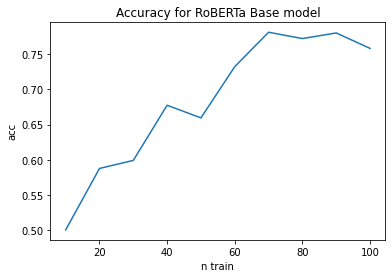

In [ ]:
plt.plot(ns,accs)
plt.title('Accuracy for RoBERTa Base model')
plt.xlabel('n train')
plt.ylabel('acc')
plt.show()

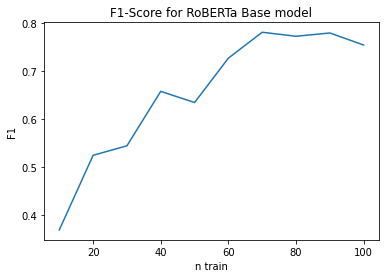

In [ ]:
plt.plot(ns,f1s)
plt.title('F1-Score for RoBERTa Base model')
plt.xlabel('n train')
plt.ylabel('F1')
plt.show()

In [ ]:
%%capture
accs = []
f1s = []
for n in np.arange(10,101,10):
    args = create_args(n,True)
    results, trainer = cross_validate(args)
    accs.append(results[2][0])
    f1s.append(results[0][0])
    del trainer

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaContrastiveLearning: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaContrastiveLearning from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaContrastiveLearning from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaContrastiveLearning were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', '

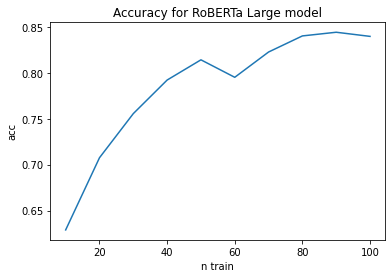

In [ ]:
plt.plot(ns,accs)
plt.title('Accuracy for RoBERTa Large model')
plt.xlabel('n train')
plt.ylabel('acc')
plt.show()

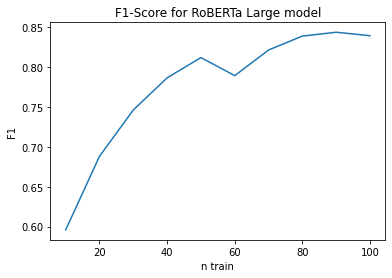

In [ ]:
plt.plot(ns,f1s)
plt.title('F1-Score for RoBERTa Large model')
plt.xlabel('n train')
plt.ylabel('F1')
plt.show()

# Models comparison - roberta-base

In [ ]:
# roberta-base for n=100
%%capture
args = create_args(100, False)
results, trainer = cross_validate(args)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--roberta-base/snapshots/ff46155979338ff8063cdad90908b498ab91b181/config.json
Model config RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta

In [ ]:
print('acc: ', results[2][0], 'std: ', results[2][1])
print('f1: ', results[0][0], 'std: ', results[0][1])

acc:  0.759 std:  0.009000000000000008
f1:  0.7540508691424319 std:  0.010622330576302519


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP_Projekt/IMDB Dataset.csv").iloc[2000:11000,:]
df = df.rename(columns={'review': 'sentence', 'sentiment': 'label'})
df['label'][df.label == 'positive'] = 1
df['label'][df.label == 'negative'] = 0

In [ ]:
%%capture
tokenizer = tokenizer = AutoTokenizer.from_pretrained("roberta-large")
test_dataset = CLDatasetClassification(np.arange(9000), df, tokenizer, 64)

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--roberta-large/snapshots/5069d8a2a32a7df4c69ef9b56348be04152a2341/config.json
Model config RobertaConfig {
  "_name_or_path": "roberta-large",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

loading file vocab.json from cache at /root/.cache/huggingface/hub

In [ ]:
pred = trainer.predict(test_dataset=test_dataset)

***** Running Prediction *****
  Num examples = 9000
  Batch size = 64


In [ ]:
# for roberta-base
pred.metrics

{'test_loss': 0.6475101709365845,
 'test_accuracy_score': 0.726,
 'test_f1_score': 0.7154953383504932,
 'test_recall_score': 0.5339719313878369,
 'test_precision_score': 0.8650306748466258,
 'test_runtime': 34.2608,
 'test_samples_per_second': 262.691,
 'test_steps_per_second': 4.115}

# Models comparison - roberta-large

In [ ]:
# roberta-large for n=100
%%capture
args = create_args(100, True)
results, trainer = cross_validate(args)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--roberta-large/snapshots/5069d8a2a32a7df4c69ef9b56348be04152a2341/config.json
Model config RobertaConfig {
  "_name_or_path": "roberta-large",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "robe

In [ ]:
print('acc: ', results[2][0], 'std: ', results[2][1])
print('f1: ', results[0][0], 'std: ', results[0][1])

acc:  0.8394999999999999 std:  0.0005000000000000004
f1:  0.839403140997314 std:  0.0005814980195831265


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP_Projekt/IMDB Dataset.csv").iloc[2000:11000,:]
df = df.rename(columns={'review': 'sentence', 'sentiment': 'label'})
df['label'][df.label == 'positive'] = 1
df['label'][df.label == 'negative'] = 0

In [ ]:
%%capture
tokenizer = tokenizer = AutoTokenizer.from_pretrained("roberta-large")
test_dataset = CLDatasetClassification(np.arange(9000), df, tokenizer, 64)

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--roberta-large/snapshots/5069d8a2a32a7df4c69ef9b56348be04152a2341/config.json
Model config RobertaConfig {
  "_name_or_path": "roberta-large",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

loading file vocab.json from cache at /root/.cache/huggingface/hub

In [ ]:
pred = trainer.predict(test_dataset=test_dataset)

***** Running Prediction *****
  Num examples = 9000
  Batch size = 64


In [ ]:
# for roberta-large
pred.metrics

{'test_loss': 0.45538005232810974,
 'test_accuracy_score': 0.8375555555555556,
 'test_f1_score': 0.837507604119494,
 'test_recall_score': 0.8556471374470929,
 'test_precision_score': 0.8251342642320086,
 'test_runtime': 102.8674,
 'test_samples_per_second': 87.491,
 'test_steps_per_second': 1.371}